In [1]:
import jovian
jovian.commit(project='Project on Sales Data Analysis  and Diabetes Prediction')

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ········
[jovian] Creating a new project "tamiratyenealem/Project on Sales Data Analysis  and Diabetes Prediction"
[jovian] Committed successfully! https://jovian.com/tamiratyenealem/project-on-sales-data-analysis-and-diabetes-prediction


'https://jovian.com/tamiratyenealem/project-on-sales-data-analysis-and-diabetes-prediction'

# MERISKILL INTERNSHIP ON DATA ANALYTICS

## Project on Sales Data Analysis

In [3]:
# Import libraries
import squarify 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar
import datetime 
from datetime import datetime 

#### Importing my data

In [4]:
sales_raw_data=pd.read_csv('Sales Data.csv',index_col='Order ID')

In [3]:
sales_raw_data.head()

,Unnamed: 0,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,,
295665,0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
295666,1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
295667,2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
295668,3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
295669,4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
#observing the shape of my data
sales_raw_data.shape

(185950, 10)

In [6]:
# let we extract the necessary ones
data=['Product', 'Quantity Ordered', 'Price Each','Order Date', 'Purchase Address', 'Sales', 'City']
sales_raw_data=sales_raw_data[data].copy()
sales_raw_data.head(5)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,New York City
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,New York City
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,New York City
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,San Francisco
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta


In [7]:
#let us observe the the summary of my data
sales_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 295665 to 222909
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Order Date        185950 non-null  object 
 4   Purchase Address  185950 non-null  object 
 5   Sales             185950 non-null  float64
 6   City              185950 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


#### As observed from the above summary, we no null data, but the order date's data type must be a date. We can also extract different parts of this data type for our analysis. 

In [8]:
sales_raw_data['Order Date']=pd.to_datetime(sales_raw_data['Order Date'])
sales_raw_data['year']=pd.DatetimeIndex(sales_raw_data['Order Date']).year
sales_raw_data['month'] = sales_raw_data['Order Date'].dt.month_name().str[:3]

sales_raw_data['day']=pd.DatetimeIndex(sales_raw_data['Order Date']).day
sales_raw_data['weekday']=pd.DatetimeIndex(sales_raw_data['Order Date']).weekday

sales_raw_data['time']=pd.DatetimeIndex(sales_raw_data['Order Date']).time
sales_raw_data['hour']=pd.DatetimeIndex(sales_raw_data['Order Date']).hour
sales_raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 295665 to 222909
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  object        
 1   Quantity Ordered  185950 non-null  int64         
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
 5   Sales             185950 non-null  float64       
 6   City              185950 non-null  object        
 7   year              185950 non-null  int32         
 8   month             185950 non-null  object        
 9   day               185950 non-null  int32         
 10  weekday           185950 non-null  int32         
 11  time              185950 non-null  object        
 12  hour              185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), objec

In [9]:
#see basic statistics
sales_raw_data.describe()

,Quantity Ordered,Price Each,Order Date,Sales,year,day,weekday,hour
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,185.490917,2019.000183,15.759532,2.991482,14.413305
min,1.000000,2.990000,2019-01-01 03:07:00,2.990000,2019.000000,1.000000,0.000000,0.000000
25%,1.000000,11.950000,2019-04-16 21:05:15,11.950000,2019.000000,8.000000,1.000000,11.000000
50%,1.000000,14.950000,2019-07-17 20:40:30,14.950000,2019.000000,16.000000,3.000000,15.000000
75%,1.000000,150.000000,2019-10-26 08:14:00,150.000000,2019.000000,23.000000,5.000000,19.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,3400.000000,2020.000000,31.000000,6.000000,23.000000
std,0.442793,332.731330,NaN,332.919771,0.013521,8.782176,2.001968,5.423416


#### Sales trend over time using the line chart

In [10]:
df_month=sales_raw_data.groupby(['year','month'])['Sales'].sum()
df_month

year  month
2019  Apr      3390670.24
      Aug      2244467.88
      Dec      4613443.34
      Feb      2202022.42
      Jan      1813586.44
      Jul      2647775.76
      Jun      2577802.26
      Mar      2807100.38
      May      3152606.75
      Nov      3199603.20
      Oct      3736726.88
      Sep      2097560.13
2020  Jan         8670.29
Name: Sales, dtype: float64

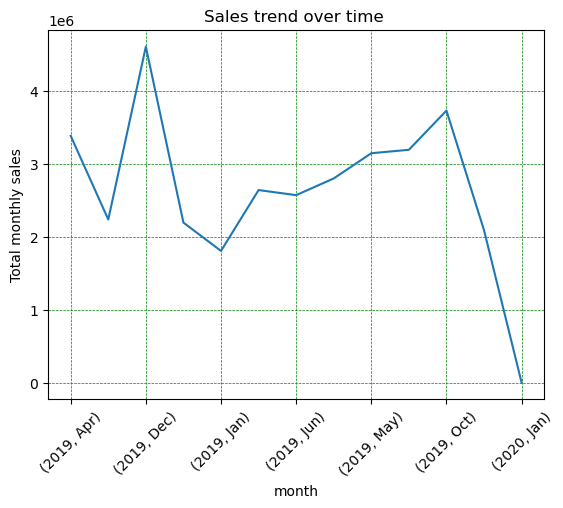

In [11]:
# plot multi_index
df_month=sales_raw_data.groupby(['year','month'])['Sales'].sum()
df_month.plot()
plt.xticks(rotation=45)

plt.title("Sales trend over time ",loc = 'center')    #'left', 'right', and 'center'.
plt.xlabel("month")
plt.ylabel("Total monthly sales")
plt.grid(axis='both',c = 'g', ls = '--', lw = 0.5)
plt.show()

plt.show()

As clearly shown by the above graph at Dec., 2019 and Oct, ,2019 but bad at Jan., 2020. 

####  Best 5 lling productswhich is represented by  Quantity Ordered

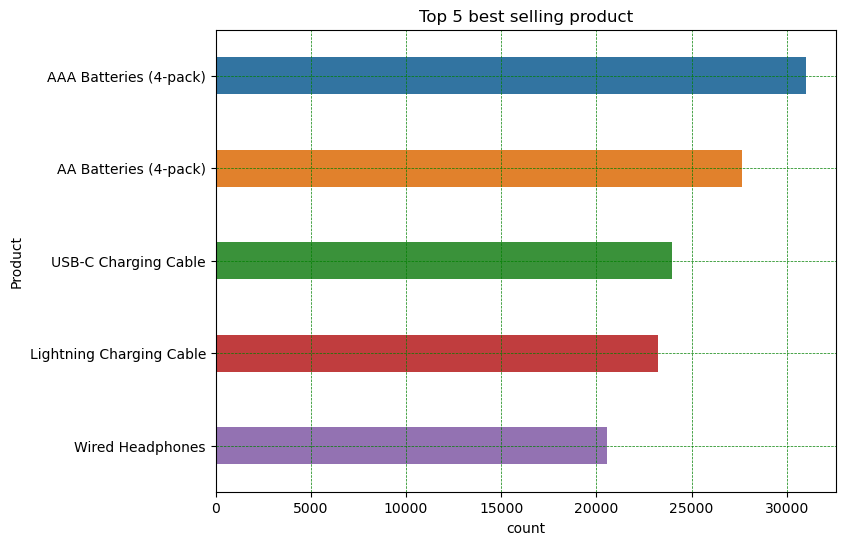

In [31]:
# Best 5 lling productswhich is represented by Quantity Ordered:  Product Vs  Quantity
top_five=sales_raw_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_five, y=top_five.index,width=.4)
plt.title("Top 5 best selling product");
plt.xlabel('count');
plt.grid(axis='both',c = 'g', ls = '--', lw = 0.5)
plt.show()

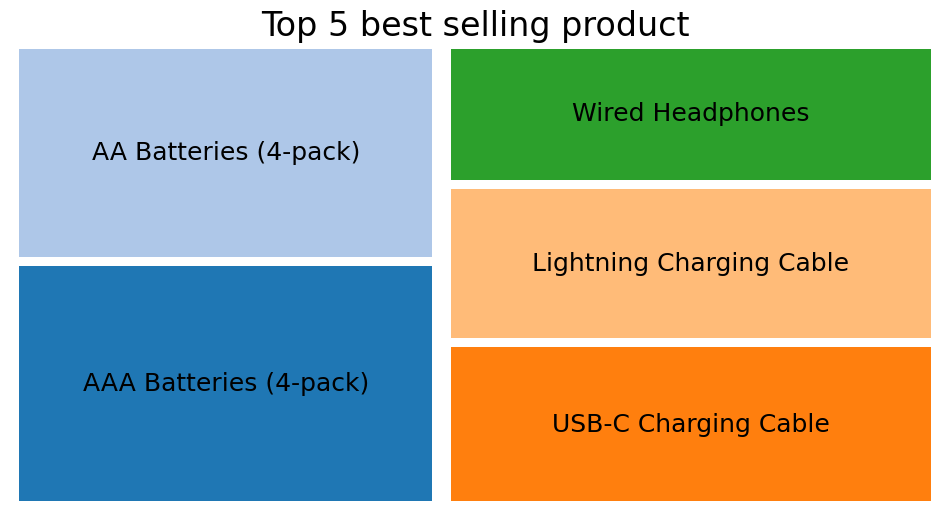

In [33]:
# create a plot figure with figsize 
plt.figure(figsize=(12, 6)) 
# we don't require the axis values so lets remove it 
plt.axis("off") 
axis = squarify.plot(top_five, 
                     label=top_five.index, 
                     color=sns.color_palette("tab20", len(top_five)), 
                     pad=1, 
                     text_kwargs={'fontsize': 18}) 
axis.set_title("Top 5 best selling product", fontsize=24);

#### Top 5 cities by sales

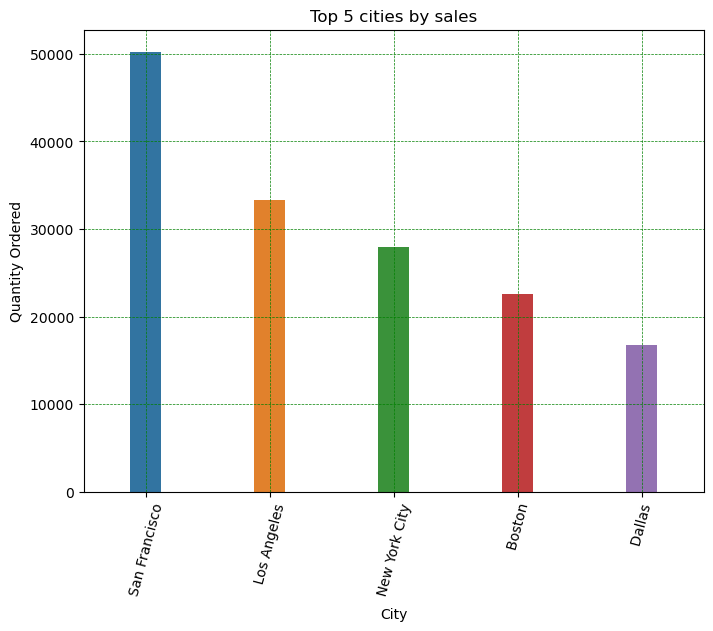

In [35]:

best_selling=sales_raw_data.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.title('Top 5 cities by sales')
sns.barplot(x=best_selling.index, y=best_selling,width=.25);
plt.grid(axis='both',c = 'g', ls = '--', lw = 0.5)
plt.show()

### sales by weekdays is presented as below

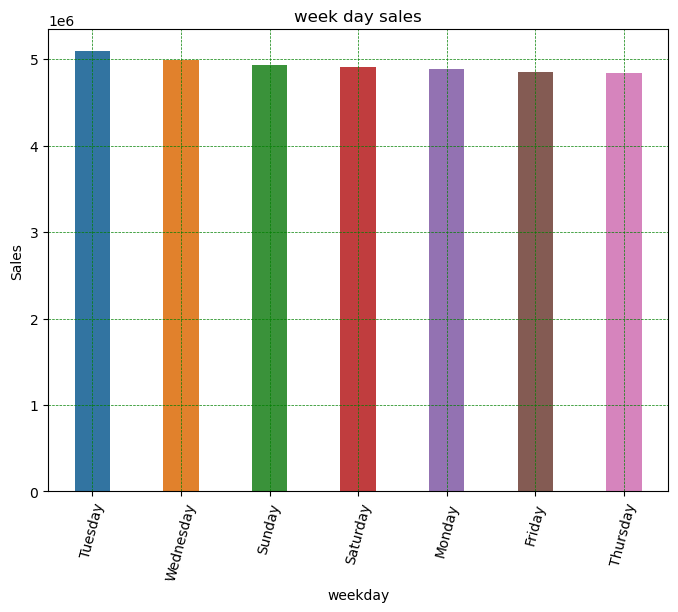

In [40]:
sales_raw_data['weekday'] = sales_raw_data['Order Date'].dt.day_name()
weekday_sales=sales_raw_data.groupby('weekday')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.title('week day sales')
sns.barplot(x=weekday_sales.index, y=weekday_sales,width=.4);
plt.grid(axis='both',c = 'g', ls = '--', lw = 0.5)
plt.show()

The graph shwos that the difference in weekdays sale is fair.

### calculating the revenue matrics 
#### For this work the following formulas are given are given
1. REVENUE = SUM OF SALES=total sales =sum(sales)
2.  total cost=sum(price each)
3.  PROFIT MARGIN = (( TOTAL SALES -TOTAL COST )/TOTAL SALES)*100;

In [48]:
total_sales =sales_raw_data['Sales'].sum()
total_sales

34492035.97

In [49]:
total_costs=sales_raw_data['Price Each'].sum()
total_costs

34289130.68

In [50]:
PM=((total_sales-total_costs)/total_sales)*100
PM

0.5882670717857282

# MERISKILL INTERNSHIP ON DATA ANALYTICS
### Project onDiabetes Prediction
The objective of the dataset is to diagnostically predict¶
The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

In particular, all patients here are females at least 21 years old of Pima Indian heritag

Pregnancies, Glucose, Blood pressure, skin thickness, Insulin, BMI , Diabetes, Age are independent, while 'Outcome' serves as the dependent variable.
From the given dataset, 0 represents that the person is not diabetic and 1 shows that the person is diabetic.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import joblib

In [55]:
# importing data
data=pd.read_csv('diabetes.csv')

In [56]:
data.shape

(768, 9)

In [57]:
# observing my data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### as can be observved above we dont have null in our data as can be rechecked below

In [58]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
# the correlation can be calculated and mapped as below
correlation=data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


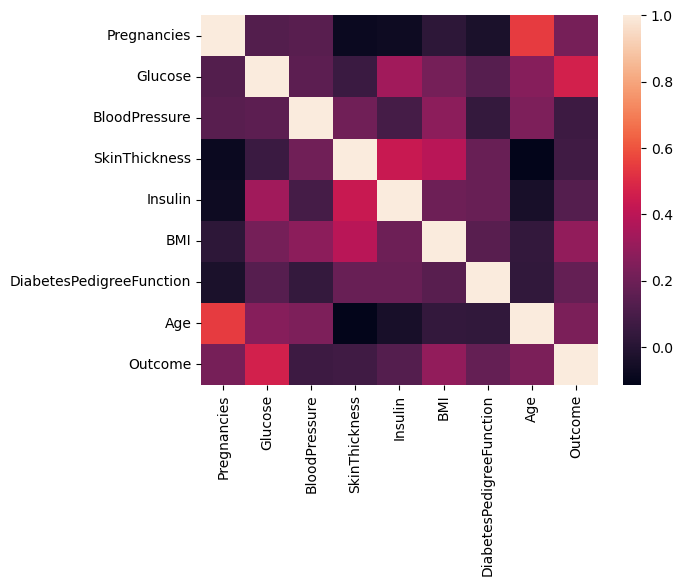

In [60]:
sns.heatmap(correlation);

#### Below, The data is splitted, model is created and trained, prediction is done and finally the accuracy is measured¶
#### 80% of the input data is used for training

In [61]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=LogisticRegression()
model.fit(x_train.values,y_train.values)
prediction=model.predict(x_test.values)

score= accuracy_score(y_test,prediction)
score

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7727272727272727

### As we shouldnt do training everytime we need prediction we should save the trained model and use whenever we need.

In [62]:
joblib.dump(model,'music-rec.joblib')

['music-rec.joblib']

### Now we can load and use our trained model

In [63]:
mod=joblib.load('music-rec.joblib')
prediction=model.predict(x_test.values)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)